In [23]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_csv('openphil.csv')
df = df.dropna() #remove impossible foods donation of unspecified size
df['month'] = np.array([i.split('/')[0] for i in df['Date']], dtype=int)
df['year'] = np.array([i.split('/')[1] for i in df['Date']], dtype=int)
df['Amount'] = np.array([re.sub('[$,]', '', i) for i in df['Amount']], dtype=float)
df['Amount'] /= 10**6 #record grants in millions

In [27]:
df = pd.read_csv('openphil.csv')
df = df.dropna() #remove impossible foods donation of unspecified size
df['month'] = np.array([i.split('/')[0] for i in df['Date']], dtype=int)
df['year'] = np.array([i.split('/')[1] for i in df['Date']], dtype=int)
df['Amount'] = np.array([re.sub('[$,]', '', i) for i in df['Amount']], dtype=float)
df['Amount'] /= 10**6 #record grants in millions
df = df.drop('Date', axis=1)
xrisk_foci = ['Biosecurity and Pandemic Preparedness', 'Global Catastrophic Risks', 
             'Potential Risks from Advanced Artificial Intelligence', 'Other areas']
df['Focus Area'] = [i if i in xrisk_foci else 'Non-xrisk' for i in  df['Focus Area']]
df.columns = ['grant', 'organization', 'focus', 'amount', 'month', 'year']
#df = df[df['year'] < 2020] #remove record of 2018, which is incomplete

In [28]:
set(df['year'])

{2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019}

In [38]:
df[df['focus']=='Potential Risks from Advanced Artificial Intelligence']['amount'].sum()

114.81376700000001

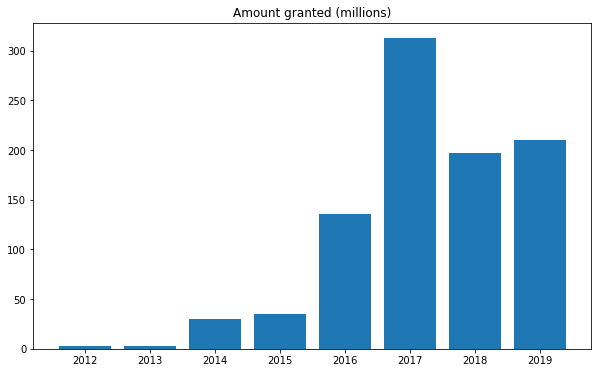

In [29]:
years = sorted(set(df['year']))
annual_amts = [df[df['year']==year]['amount'].sum() for year in years]
plt.figure(figsize=(10, 6));
plt.bar(years, annual_amts);
plt.title('Amount granted (millions)');

Text(0, 0.5, 'Total donated (millions)')

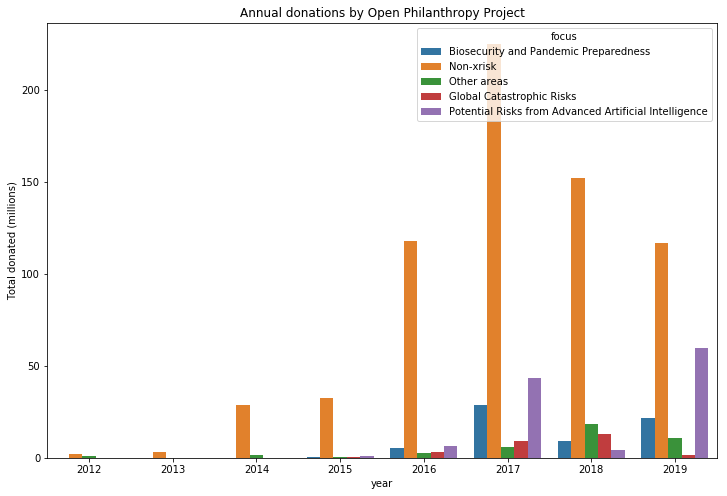

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(x='year', y='amount', hue='focus', data=df, estimator=sum, ci=None);
plt.title('Annual donations by Open Philanthropy Project')
plt.ylabel('Total donated (millions)')

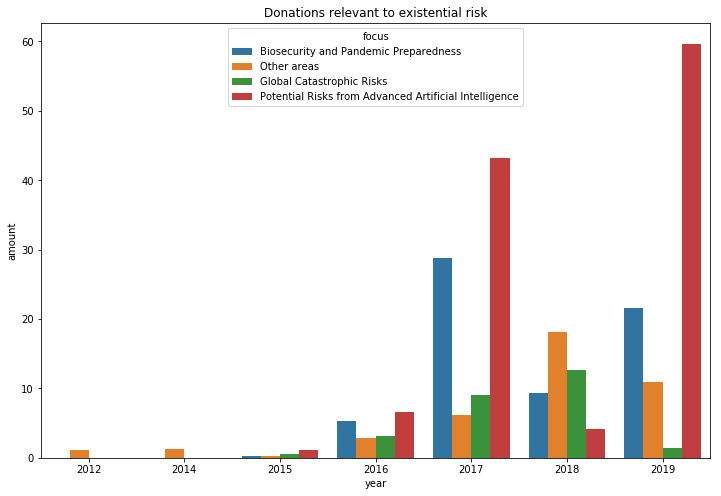

In [31]:
df_xrisk = df[[i in xrisk_foci for i in df['focus']]]
plt.figure(figsize=(12,8))
sns.barplot(x='year', y='amount', hue='focus', data=df_xrisk, estimator=sum, ci=None);
plt.title('Donations relevant to existential risk');

In [32]:
#construct a dataframe of annual spending percentages
df_perc = []
for year in years:
    for focus in set(df['focus']):
        amt = df.loc[(df['focus']==focus) & (df['year']==year), 'amount'].sum()
        percent = 100 * amt / df.loc[df['year']==year, 'amount'].sum()
        df_perc.append({'year':year, 'focus':focus, 'percent': percent})
df_perc = pd.DataFrame(df_perc)

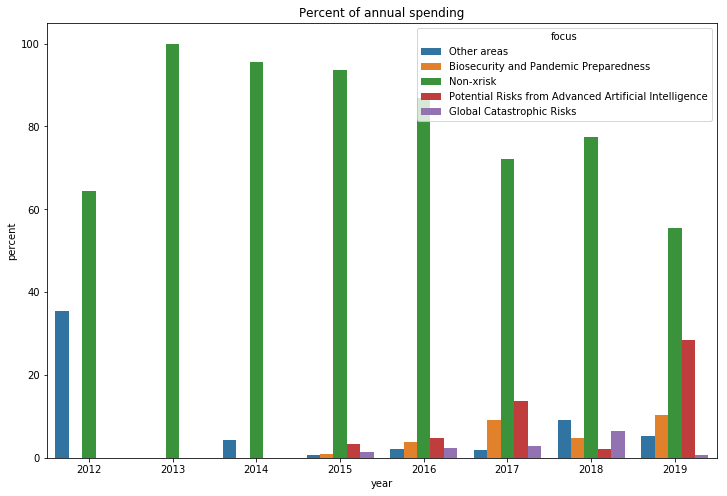

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(x='year', hue='focus', y='percent', data=df_perc);
plt.title('Percent of annual spending');